In [9]:
#Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [2]:
#Loading Data

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values=' ')

data.TotalCharges.fillna(0, inplace = True)
data.TotalCharges = data.TotalCharges.astype(float)

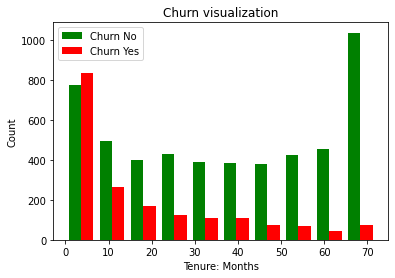

In [3]:
#Datavisualization

tenure_yes = data[data.Churn == 'Yes'].tenure
tenure_no = data[data.Churn == 'No'].tenure
plt.hist([tenure_no,tenure_yes], color=['Green', 'red'])
plt.legend(['Churn No','Churn Yes'])
plt.xlabel('Tenure: Months')
plt.ylabel('Count')
plt.title('Churn visualization')
plt.show()

In [4]:
#Creating our features featuresframe

data = data.replace(['No phone service', 'No internet service'],'No')
features = data.drop(['customerID'], axis=1)

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    features[col].replace({'Yes': 1, 'No':0},inplace=True)

features.gender.replace({'Female': 1, 'Male': 0}, inplace=True)

df = pd.get_dummies(data=features, columns=['InternetService','Contract','PaymentMethod'])

In [5]:
#Scaling

scaler = MinMaxScaler()

cols_to_scale = ['tenure', 'TotalCharges', 'MonthlyCharges']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

X = df.drop('Churn', axis='columns')
y = df.Churn
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.152778,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.055556,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [6]:
#Building model

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=5)

model = Sequential()

model.add(Dense(20, input_shape=(26,), activation ='relu'))
model.add(Dense(20, activation ='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer="adam", loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=40, validation_split=0.2)

Epoch 1/40
141/141 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.6907 - val_loss: 0.4505 - val_accuracy: 0.7853
Epoch 2/40
141/141 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7874 - val_loss: 0.4196 - val_accuracy: 0.8030
Epoch 3/40
141/141 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.7930 - val_loss: 0.4143 - val_accuracy: 0.8066
Epoch 4/40
141/141 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.7979 - val_loss: 0.4130 - val_accuracy: 0.8119
Epoch 5/40
141/141 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8021 - val_loss: 0.4099 - val_accuracy: 0.8092
Epoch 6/40
141/141 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8019 - val_loss: 0.4135 - val_accuracy: 0.8083
Epoch 7/40
141/141 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8023 - val_loss: 0.4075 - val_accuracy: 0.8119
Epoch 

In [15]:
model.save("model.h5")

In [7]:
#Evaluating Model

model.evaluate(x_test, y_test)

yp = model.predict(x_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


45/45 [==============================] - 0s 591us/step


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1023
           1       0.67      0.47      0.55       386

    accuracy                           0.79      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Text(69.0, 0.5, 'Truth')

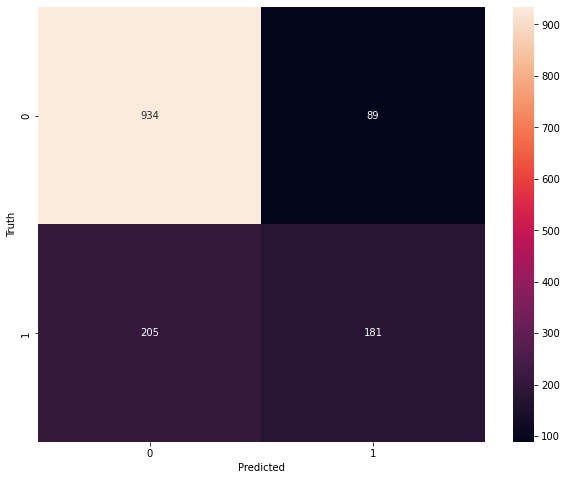

In [14]:
#Visualizing results

print(classification_report(y_test, y_pred))


import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred )
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')